# Loan Approval Prediction

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path

In [8]:
data_path =  Path("./data")

In [10]:
data = pd.read_csv(data_path / "train.csv")

## EDA

In [12]:
data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [13]:
data.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [16]:
data.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

## Playing with the data

In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [21]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']

In [29]:
col_names = X.columns.to_list()

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.4+ MB


In [34]:
categorical_cols = X.select_dtypes(include=['object']).columns.to_list()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.to_list()

In [35]:
X[categorical_cols].nunique()

person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
dtype: int64

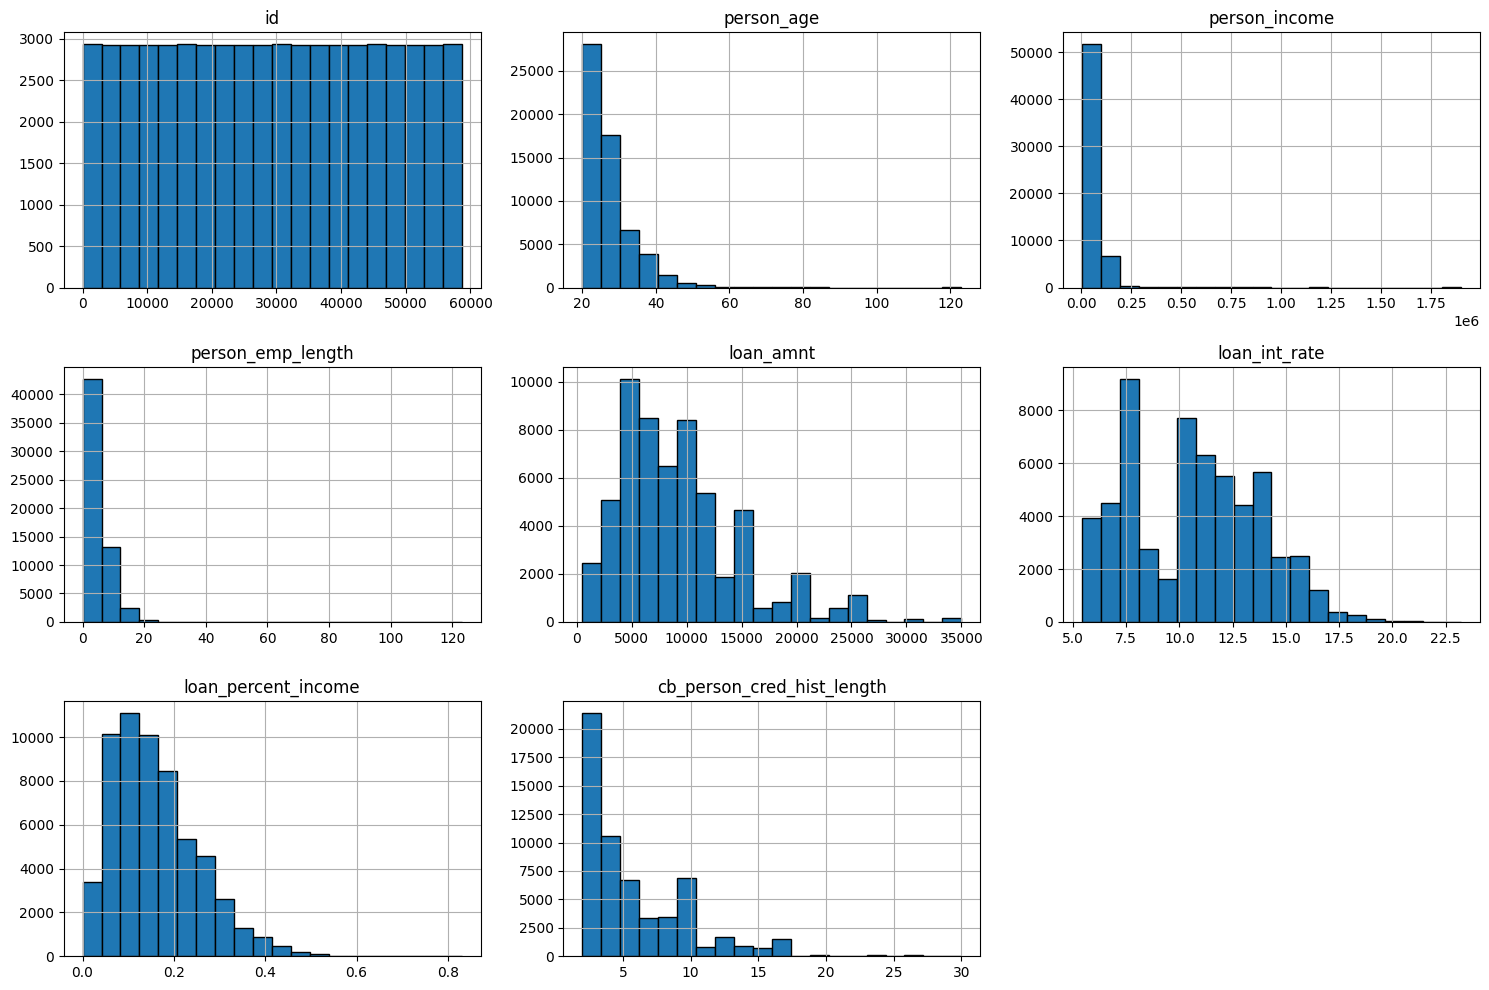

In [40]:
import matplotlib.pyplot as plt

X[numerical_cols].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

In [53]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [54]:
X_train.shape, X_val.shape

((46916, 12), (11729, 12))

In [46]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
	transformers=[
		('num', StandardScaler(), numerical_cols),
		('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
	])

In [49]:
processor_fitted = preprocessor.fit(X_train)

In [50]:
X_train_preprocessed = preprocessor.transform(X_train)

In [56]:
X_train_preprocessed.shape

(46916, 27)

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [59]:
rnd_forest = RandomForestClassifier(n_estimators=100, random_state=42)
log_reg = LogisticRegression()

In [60]:
rnd_forest_scores = cross_val_score(rnd_forest, X_train_preprocessed, y_train, cv=5, scoring='accuracy')

In [62]:
rnd_forest_fitted = rnd_forest.fit(X_train_preprocessed, y_train)

In [63]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [64]:
y_preds = rnd_forest_fitted.predict(preprocessor.transform(X_val))

In [65]:
accuracy_score(y_val, y_preds)

0.9506351777645153

In [66]:
confusion_matrix(y_val, y_preds)

array([[9969,   90],
       [ 489, 1181]], dtype=int64)

In [67]:
precision_recall_curve(y_val, y_preds)

(array([0.14238213, 0.92918961, 1.        ]),
 array([1.        , 0.70718563, 0.        ]),
 array([0, 1], dtype=int64))

In [68]:
roc_curve(y_val, y_preds)

(array([0.        , 0.00894721, 1.        ]),
 array([0.        , 0.70718563, 1.        ]),
 array([inf,  1.,  0.]))

In [69]:
roc_auc_score(y_val, y_preds)

0.849119208645042